# Venn Diagrams

This script serves to compare the differential expressed genes of HSCs and MPPs from two different dataset and visualize them as venn diagrams

## Libraries 

In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from adjustText import adjust_text
import random 
from bioinfokit import analys, visuz
from matplotlib_venn import venn2
print('I am ready to proceed')

I am ready to proceed


## Loading data 

In [33]:
file1_path="C:/Users/amade/Documents/UofSC/Bioinformatics/MPP_analysis/MPP significant genes only.xlsx"   # MPP file 
file2_path="C:/Users/amade/Documents/UofSC/Bioinformatics/MPP_analysis/10.1182-2020007876_bloodbld2020007876-suppl2.xlsx"  # Signature genes
# Updating the files 
file1_df = pd.read_excel(file1_path, None)
file2_df = pd.read_excel(file2_path,None)

In [34]:
print(file1_df)

{'Sheet1':               Unnamed: 0  MouseID  HGNC      logFC     logCPM         PValue  \
0     ENSMUSG00000059751   Rps3a3   NaN  -7.775232   8.960677   3.160000e-89   
1     ENSMUSG00000062611   Rps3a2   NaN  -6.182134   6.910925   4.540000e-48   
2     ENSMUSG00000076281  Gm24270   NaN  -4.230269   7.293704   3.390000e-18   
3     ENSMUSG00000076258  Gm23935   NaN  -4.228898  11.494923   2.380000e-20   
4     ENSMUSG00000069919   Hba-a1  HBA2  -4.052145   4.066886   1.380870e-04   
...                  ...      ...   ...        ...        ...            ...   
2951  ENSMUSG00000051747      Ttn   TTN   7.563296   8.183110   9.940000e-20   
2952  ENSMUSG00000095280  Gm21738   NaN  10.661378  12.145981  4.920000e-119   
2953  ENSMUSG00000075015  Gm10801   NaN  10.732614  11.323339  9.960000e-122   
2954  ENSMUSG00000075014  Gm10800   NaN  10.810096  14.893461  1.650000e-113   
2955  ENSMUSG00000097312  Gm26870   NaN  10.826630  12.009054  2.370000e-120   

                FDR  Tgw.Dis

In [35]:
print(file2_df)

{'HSC':       EntrezGeneID     GeneSymbol           ensemblID
0            69066  1810010H24Rik  ENSMUSG00000078607
1            69120  1810021B22Rik  ENSMUSG00000087331
2            69221  2410006H16Rik  ENSMUSG00000086841
3            72190  2510009E07Rik  ENSMUSG00000043391
4            67261  2900005J15Rik  ENSMUSG00000043833
...            ...            ...                 ...
1181         76642            NaN                 NaN
1182         76972            NaN                 NaN
1183         77533            NaN                 NaN
1184         78103            NaN                 NaN
1185         78403            NaN                 NaN

[1186 rows x 3 columns], 'MPP1':      EntrezGeneID     GeneSymbol           ensemblID
0           69349  1700008O03Rik  ENSMUSG00000008028
1           74076  4933406C10Rik  ENSMUSG00000097494
2          211378  6720489N17Rik  ENSMUSG00000072066
3           11303          Abca1  ENSMUSG00000015243
4           13349          Ackr1  ENSMUSG0000

In [36]:
# Obtaining the gene column from the first datset 
genes_file1 = set(file1_df['Sheet1']['Unnamed: 0'])  
# Obtaining the gene column from each one of the sheets present in the second file 
genes_file2 = {sheet_name: set(df['ensemblID']) for sheet_name, df in file2_df.items()}

In [37]:
# Finding out the overlapping genes bettwen the two datasets

In [38]:
overlap_results = {sheet_name: genes_file1.intersection(genes) for sheet_name, genes in genes_file2.items()}
overlap_counts = {sheet_name: len(overlap) for sheet_name, overlap in overlap_results.items()}
print(overlap_counts)

{'HSC': 246, 'MPP1': 34, 'MPP2': 256, 'MPP3': 76, 'MPP4': 115, 'MPP5': 42}


## Visualization 

In [39]:
# Creating different venn diagrams to visualize the overlapping genes in each dataset 

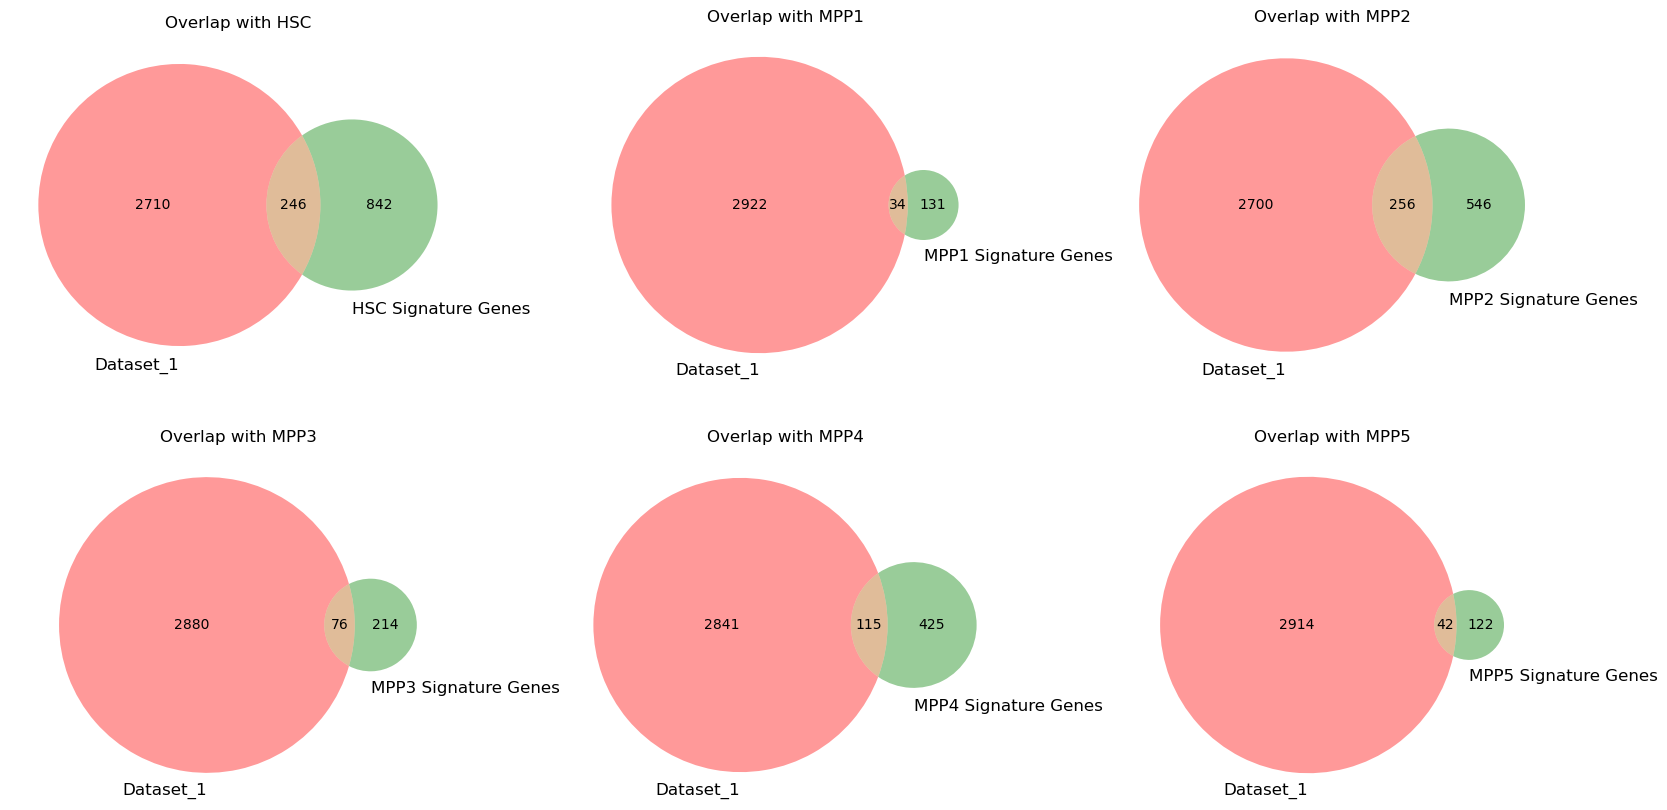

In [40]:
plt.figure(figsize=(20, 10))
for idx, (sheet_name, genes) in enumerate(genes_file2.items(), 1):
    plt.subplot(2, 3, idx)
    venn_diagram = venn2([genes_file1, genes], ('Dataset_1', f'{sheet_name} Signature Genes'))
    plt.title(f'Overlap with {sheet_name}',size=12)
plt.show()